In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

3 Stocks ARE GIVEN of car companies

In [65]:
Porsche = pd.read_csv('Porsche_Stock.csv',index_col='Date',parse_dates=True)
Porsche.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052
2012-01-04,28.21,28.67,27.50,27.71,630036
2012-01-05,27.76,27.93,26.85,27.12,1005432
2012-01-06,27.20,27.79,26.41,26.89,687081
2012-01-09,27.00,27.49,26.12,27.25,896951


In [66]:
McLaren = pd.read_csv('McLaren_Stock.csv',index_col='Date',parse_dates=True)
McLaren.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,11.00,11.25,10.99,11.13,45709811
2012-01-04,11.15,11.53,11.07,11.30,79725188
2012-01-05,11.33,11.63,11.24,11.59,67877467
2012-01-06,11.74,11.80,11.52,11.71,59840605
2012-01-09,11.83,11.95,11.70,11.80,53981467


In [67]:
Bentley = pd.read_csv('Bentley_Stock.csv',index_col='Date',parse_dates=True)
Bentley.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,20.83,21.18,20.75,21.05,9321420
2012-01-04,21.05,21.37,20.75,21.15,7856752
2012-01-05,21.10,22.29,20.96,22.17,17884040
2012-01-06,22.26,23.03,22.24,22.92,18234608
2012-01-09,23.20,23.43,22.70,22.84,12091714


# LINEAR PLOT CREATED for the STOCKS of 'OPEN' price column  

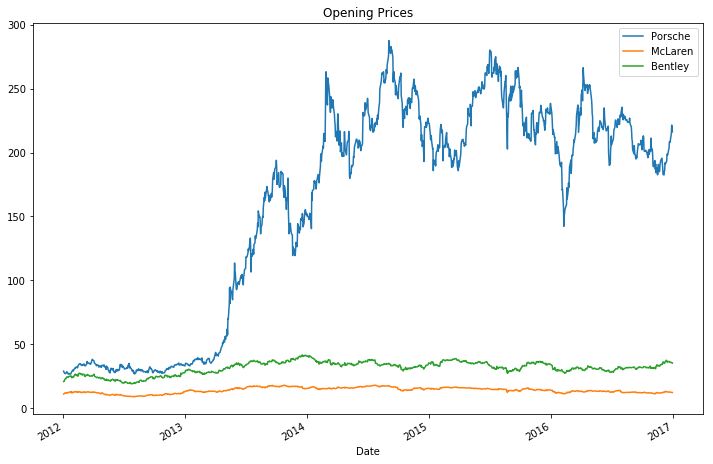

In [68]:
Porsche['Open'].plot(label='Porsche',figsize=(12,8),title='Opening Prices')
McLaren['Open'].plot(label='McLaren')
Bentley['Open'].plot(label='Bentley')
plt.legend();

PLOTING VOLUME of STOCK TRADED on each day

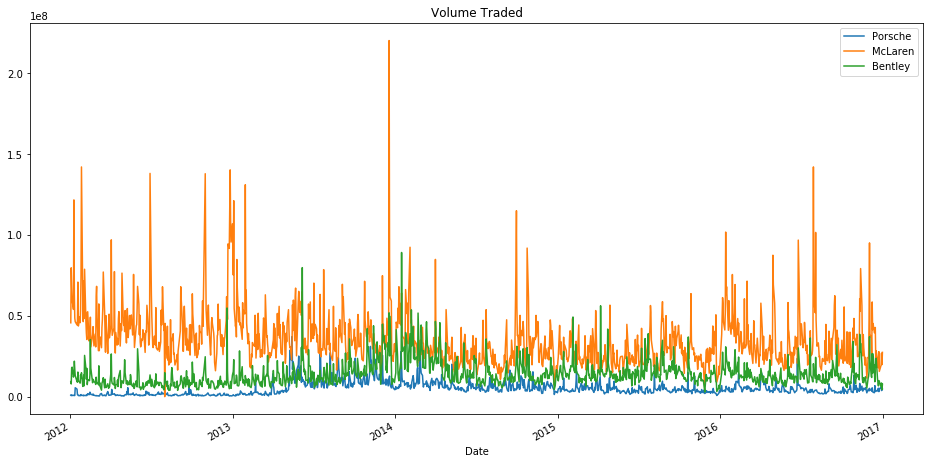

In [69]:
Porsche['Volume'].plot(label='Porsche',figsize=(16,8),title='Volume Traded')
McLaren['Volume'].plot(label='McLaren')
Bentley['Volume'].plot(label='Bentley')
plt.legend();

ABOVE PLOT:

At late 2013: McLaren having a big spike.

To find what date is occured is given below:

In [70]:
McLaren['Volume'].max()         # it gives the value of the volume

220362796

In [71]:
McLaren['Volume'].idxmax()      # this gives actual date

Timestamp('2013-12-18 00:00:00')

# TOTAL TRADED 

column created which is OPEN col multiplied by VOLUME col

In [73]:
Porsche['Total Traded'] = Porsche['Open'] * Porsche['Volume']
McLaren['Total Traded'] = McLaren['Open'] * McLaren['Volume']
Bentley['Total Traded'] = Bentley['Open'] * Bentley['Volume']

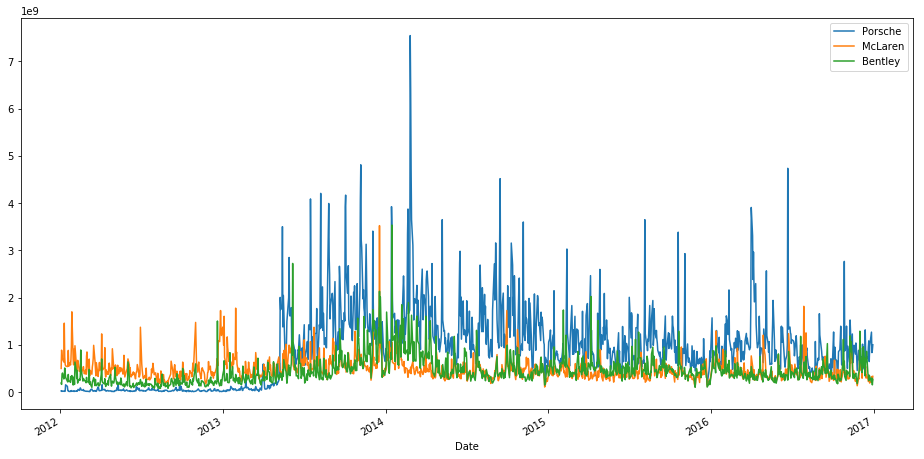

In [74]:
Porsche['Total Traded'].plot(label='Porsche',figsize=(16,8))
McLaren['Total Traded'].plot(label='McLaren')
Bentley['Total Traded'].plot(label='Bentley')
plt.legend()

huge aount of money traded for PORSCHE in early 2014 at the day of

In [75]:
Porsche['Total Traded'].idxmax()

Timestamp('2014-02-25 00:00:00')

# MOVING AVERAGE

Showing MA50 : after rolling to 50 position the plot is shown

Showing MA200 : after rolling to 200 position the plot is shown


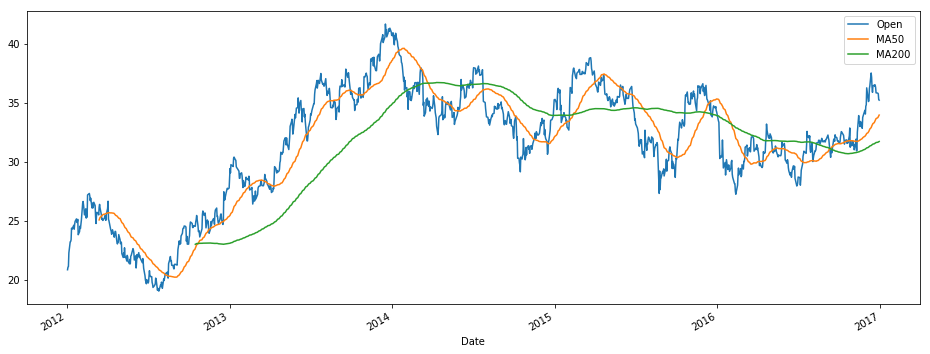

In [76]:
Bentley['MA50'] = Bentley['Open'].rolling(50).mean()
Bentley['MA200'] = Bentley['Open'].rolling(200).mean()
Bentley[['Open','MA50','MA200']].plot(figsize=(16,6))

# SCATTER PLOTS

In [77]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018379A56DA0>,
      dtype=object)

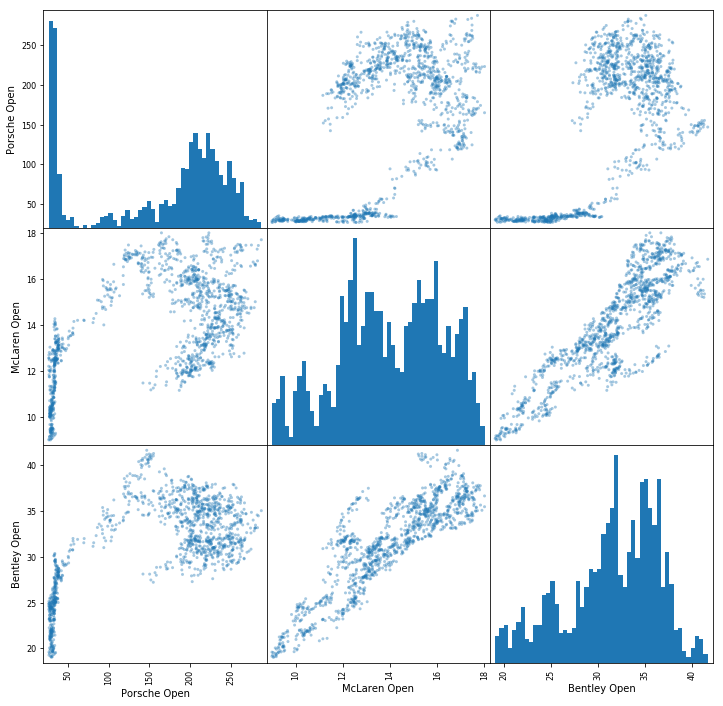

In [78]:
car_comp = pd.concat([Porsche['Open'],McLaren['Open'],Bentley['Open']],axis=1)
car_comp.columns = ['Porsche Open','McLaren Open','Bentley Open',]
scatter_matrix(car_comp,figsize=(12,12),alpha=0.4,hist_kwds={'bins':50})

# DAILY PERCENTAGE CHANGE

formula:

rt={pt/(pt−1)} −1 

# also known as DAILY RETURN :  profit/loss made by the stock compared to the                               previous day. 
                
if the value is above 0 : profit

if the value is negative : loss

Date                         Daily Return                  %Daily Return
01/01/2018                 10/10 =  1                          -   
01/02/2018                 15/10 =  3/2                       50%
01/03/2018                 20/15 =  4/3                       33%
01/04/2018                 25/20 =  5/4                       20%

In [79]:
#  rt :   return at time t 
#  pt :   price at time t 
#  pt-1 : price at time t-1 (the previous day) 


# DEFINATION OF DAILY PERCENTAGE-
# rt (return at time t) as equal to the price at time t 
# divided by the price at time t-1 (the previous day) minus 1.

helpful for attempting to predict future values of the stock, its very helpful in analyzing the volatility of the stock.

HIGH RISK  - wide distribution, less stable, far from 0, more volatile
 
LOW RISK  - narrow distrbution, more stable, near to 0, less volatile

In [80]:
# daily return col is created
# using .shift() method

Porsche['returns'] = (Porsche['Close']/ Porsche['Close'].shift(1))-1
Porsche.head()

,Open,High,Low,Close,Volume,Total Traded,returns
Date,,,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052,26857824.88,NaN
2012-01-04,28.21,28.67,27.50,27.71,630036,17773315.56,-0.013177
2012-01-05,27.76,27.93,26.85,27.12,1005432,27910792.32,-0.021292
2012-01-06,27.20,27.79,26.41,26.89,687081,18688603.20,-0.008481
2012-01-09,27.00,27.49,26.12,27.25,896951,24217677.00,0.013388


# .shift() method explaination

In [81]:
Porsche['Close'].head()      # pt = price at time t (2012-01-04    27.71)

Date
2012-01-03    28.08
2012-01-04    27.71
2012-01-05    27.12
2012-01-06    26.89
2012-01-09    27.25
Name: Close, dtype: float64

In [82]:
Porsche['Close'].shift(1).head()     # pt-1 = price at time t-1 (the previous day) [2012-01-04     28.08]

Date
2012-01-03      NaN
2012-01-04    28.08
2012-01-05    27.71
2012-01-06    27.12
2012-01-09    26.89
Name: Close, dtype: float64

.shift() method [1ST CASE SOLVE]

pt = 27.71

pt-1 = 28.08

pt/pt-1 = 0.986

rt = {pt/pt-1} -1 = 0.986 -1 = -0.013

# CAN BE DONE ALSO BY DIRECT PANDA METHOD 

pct_change(1)

In [83]:
Porsche.head()

,Open,High,Low,Close,Volume,Total Traded,returns
Date,,,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052,26857824.88,NaN
2012-01-04,28.21,28.67,27.50,27.71,630036,17773315.56,-0.013177
2012-01-05,27.76,27.93,26.85,27.12,1005432,27910792.32,-0.021292
2012-01-06,27.20,27.79,26.41,26.89,687081,18688603.20,-0.008481
2012-01-09,27.00,27.49,26.12,27.25,896951,24217677.00,0.013388


CREATING DAILY % for all 3 car companies

In [84]:
Porsche['returns'] = Porsche['Close'].pct_change(1)
McLaren['returns'] = McLaren['Close'].pct_change(1)
Bentley['returns'] = Bentley['Close'].pct_change(1)


In [85]:
Porsche.head()

,Open,High,Low,Close,Volume,Total Traded,returns
Date,,,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052,26857824.88,NaN
2012-01-04,28.21,28.67,27.50,27.71,630036,17773315.56,-0.013177
2012-01-05,27.76,27.93,26.85,27.12,1005432,27910792.32,-0.021292
2012-01-06,27.20,27.79,26.41,26.89,687081,18688603.20,-0.008481
2012-01-09,27.00,27.49,26.12,27.25,896951,24217677.00,0.013388


In [86]:
McLaren.head()

,Open,High,Low,Close,Volume,Total Traded,returns
Date,,,,,,,
2012-01-03,11.00,11.25,10.99,11.13,45709811,5.028079e+08,NaN
2012-01-04,11.15,11.53,11.07,11.30,79725188,8.889358e+08,0.015274
2012-01-05,11.33,11.63,11.24,11.59,67877467,7.690517e+08,0.025664
2012-01-06,11.74,11.80,11.52,11.71,59840605,7.025287e+08,0.010354
2012-01-09,11.83,11.95,11.70,11.80,53981467,6.386008e+08,0.007686


In [87]:
Bentley.head()

,Open,High,Low,Close,Volume,Total Traded,MA50,MA200,returns
Date,,,,,,,,,
2012-01-03,20.83,21.18,20.75,21.05,9321420,1.941652e+08,NaN,NaN,NaN
2012-01-04,21.05,21.37,20.75,21.15,7856752,1.653846e+08,NaN,NaN,0.004751
2012-01-05,21.10,22.29,20.96,22.17,17884040,3.773532e+08,NaN,NaN,0.048227
2012-01-06,22.26,23.03,22.24,22.92,18234608,4.059024e+08,NaN,NaN,0.033829
2012-01-09,23.20,23.43,22.70,22.84,12091714,2.805278e+08,NaN,NaN,-0.003490


LOOKING WHICH ONE IS THE MOST VOLATILE

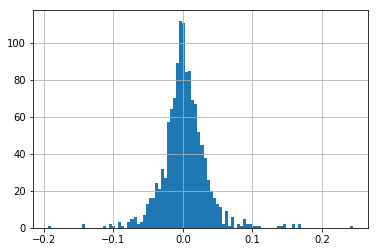

In [92]:
Porsche['returns'].hist(bins=100);

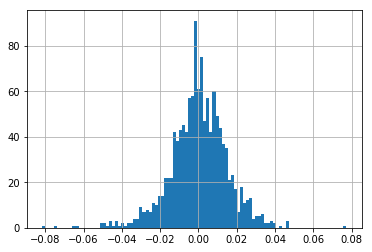

In [91]:
McLaren['returns'].hist(bins=100);

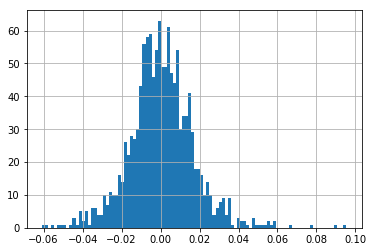

In [94]:
Bentley['returns'].hist(bins=100);

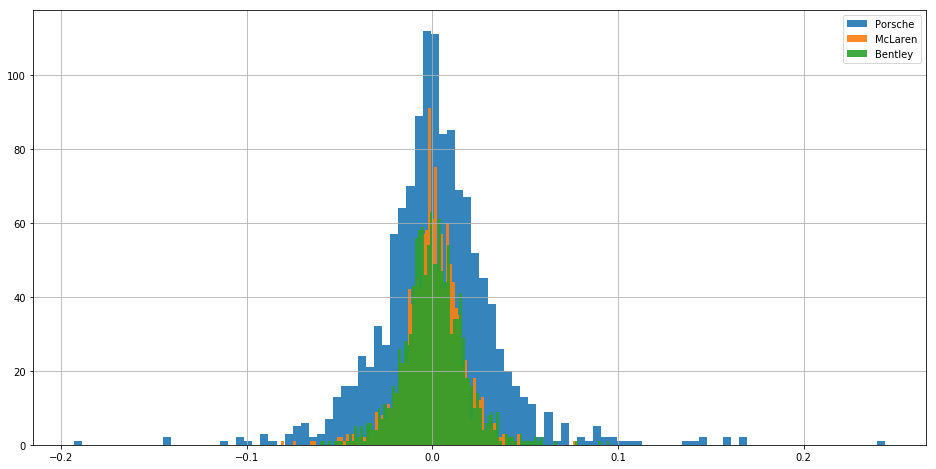

In [100]:
Porsche['returns'].hist(bins=100,figsize=(16,8),alpha=0.9,label='Porsche');
McLaren['returns'].hist(bins=100,figsize=(16,8),alpha=0.9,label='McLaren');
Bentley['returns'].hist(bins=100,figsize=(16,8),alpha=0.9,label='Bentley');
plt.legend();

Porsche having : MORE VOLATILITY as it has wide distribution

as compared to McLaren & Bentley

# KDE 

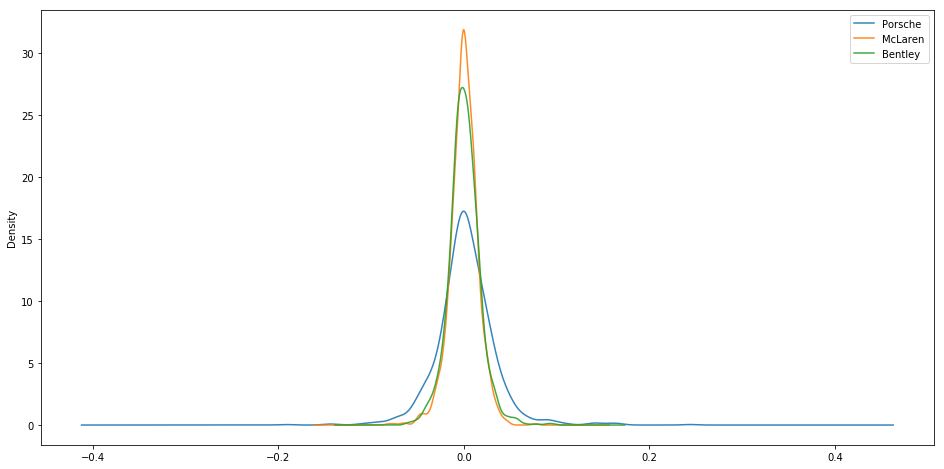

In [104]:
Porsche['returns'].plot(kind='kde',label='Porsche',figsize=(16,8),alpha=0.9)
McLaren['returns'].plot(kind='kde',label='McLaren',figsize=(16,8),alpha=0.9)
Bentley['returns'].plot(kind='kde',label='Bentley',figsize=(16,8),alpha=0.9)
plt.legend();


# by kde it is easy to determine the volatility

# BOX PLOTS

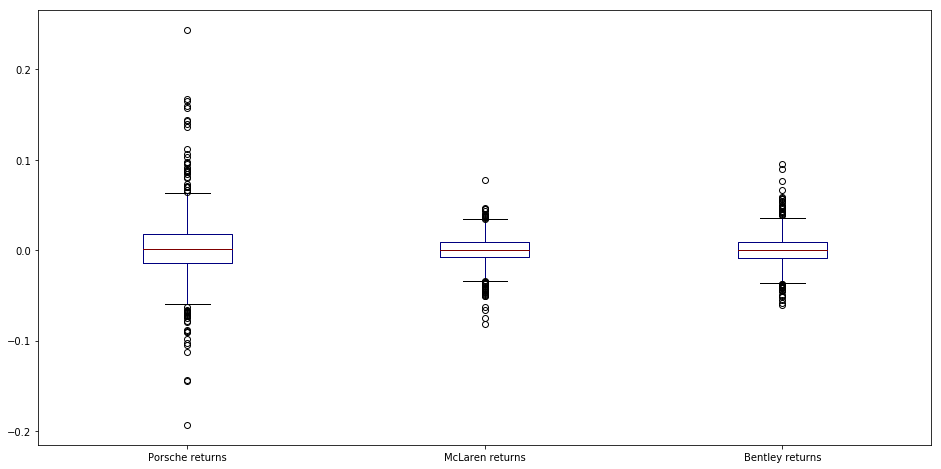

In [106]:
box_df = pd.concat([Porsche['returns'],McLaren['returns'],Bentley['returns']],axis=1)
box_df.columns = ['Porsche returns', 'McLaren returns', 'Bentley returns']
box_df.plot(kind='box',figsize=(16,8),cmap='jet');

# COMPARING DAILY RETURNS between the stocks

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001837E193F60>,
      dtype=object)

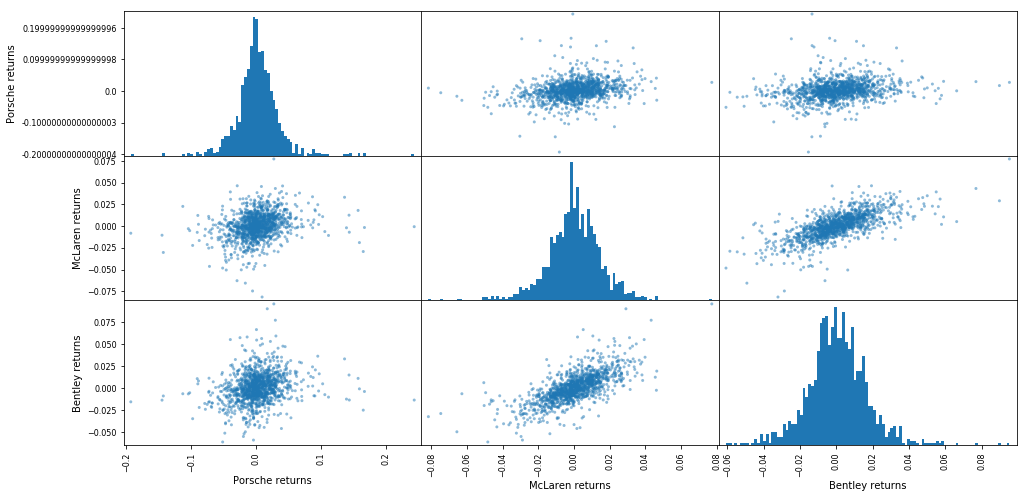

In [110]:
scatter_matrix(box_df,figsize=(16,8),hist_kwds={'bins':100})

As McLaren & Bentley both are some sort of similar 

So let's plot both in a same scatter plot

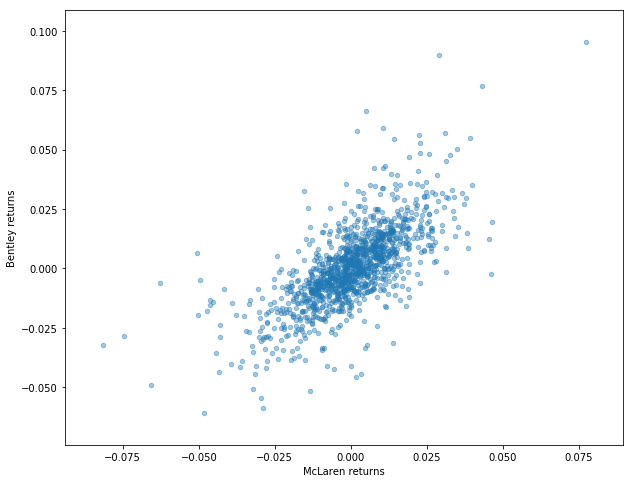

In [112]:
box_df.plot(kind='scatter', x = 'McLaren returns', y= 'Bentley returns', alpha=0.4,figsize=(10,8))

# CUMULATIVE RETURN

daily returns are useful,but

it doesn't give the investor a immediate insight into the profits he had made till date, 

especially if the stock is very volatile. 

C. RETURN IS COMPUTED RELATIVE TO THE DAY INVESTMENT IS MADE

PROFIT  : if the cumulative return is 1 

LOSS    : if the cumulative return is equal to 0

df [daily_cumulative_return] = ( 1 + df [pct_daily_return] ).cumprod()

In [128]:
# cumprod : cumulative product is a defined function of pandas

Porsche['cumulative return'] = (1 + Porsche['returns']).cumprod()
McLaren['cumulative return'] = (1 + McLaren['returns']).cumprod()
Bentley['cumulative return'] = (1 + Bentley['returns']).cumprod()

In [120]:
Porsche.head(10)

# here at date [ 2012-01-11 ] the profit is made 

,Open,High,Low,Close,Volume,Total Traded,returns,cumulative return
Date,,,,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052,2.685782e+07,NaN,NaN
2012-01-04,28.21,28.67,27.50,27.71,630036,1.777332e+07,-0.013177,0.986823
2012-01-05,27.76,27.93,26.85,27.12,1005432,2.791079e+07,-0.021292,0.965812
2012-01-06,27.20,27.79,26.41,26.89,687081,1.868860e+07,-0.008481,0.957621
2012-01-09,27.00,27.49,26.12,27.25,896951,2.421768e+07,0.013388,0.970442
2012-01-10,27.44,27.76,27.25,27.62,671732,1.843233e+07,0.013578,0.983618
2012-01-11,27.62,28.38,27.30,28.23,672239,1.856724e+07,0.022085,1.005342
2012-01-12,28.48,28.62,27.80,28.25,729300,2.077046e+07,0.000708,1.006054
2012-01-13,28.40,28.50,22.64,22.79,5506439,1.563829e+08,-0.193274,0.811610


In [126]:
McLaren.head(10)

# from the second day only McLaren start to made profit 

,Open,High,Low,Close,Volume,Total Traded,returns,cumulative return
Date,,,,,,,,
2012-01-03,11.00,11.25,10.99,11.13,45709811,5.028079e+08,NaN,NaN
2012-01-04,11.15,11.53,11.07,11.30,79725188,8.889358e+08,0.015274,1.015274
2012-01-05,11.33,11.63,11.24,11.59,67877467,7.690517e+08,0.025664,1.041330
2012-01-06,11.74,11.80,11.52,11.71,59840605,7.025287e+08,0.010354,1.052111
2012-01-09,11.83,11.95,11.70,11.80,53981467,6.386008e+08,0.007686,1.060198
2012-01-10,12.00,12.05,11.63,11.80,121750545,1.461007e+09,0.000000,1.060198
2012-01-11,11.74,12.18,11.65,12.07,63806007,7.490825e+08,0.022881,1.084456
2012-01-12,12.16,12.18,11.89,12.14,48687666,5.920420e+08,0.005800,1.090746
2012-01-13,12.01,12.08,11.84,12.04,46388677,5.571280e+08,-0.008237,1.081761


In [127]:
Bentley.head(10)

,Open,High,Low,Close,Volume,Total Traded,MA50,MA200,returns,cumulative return
Date,,,,,,,,,,
2012-01-03,20.83,21.18,20.75,21.05,9321420,1.941652e+08,NaN,NaN,NaN,NaN
2012-01-04,21.05,21.37,20.75,21.15,7856752,1.653846e+08,NaN,NaN,0.004751,1.004751
2012-01-05,21.10,22.29,20.96,22.17,17884040,3.773532e+08,NaN,NaN,0.048227,1.053207
2012-01-06,22.26,23.03,22.24,22.92,18234608,4.059024e+08,NaN,NaN,0.033829,1.088836
2012-01-09,23.20,23.43,22.70,22.84,12091714,2.805278e+08,NaN,NaN,-0.003490,1.085036
2012-01-10,23.22,23.40,22.78,23.24,13538355,3.143606e+08,NaN,NaN,0.017513,1.104038
2012-01-11,23.37,24.64,23.34,24.47,21946958,5.129004e+08,NaN,NaN,0.052926,1.162470
2012-01-12,24.35,24.82,23.76,24.67,16751370,4.078959e+08,NaN,NaN,0.008173,1.171971
2012-01-13,24.27,24.65,23.91,24.29,12964715,3.146536e+08,NaN,NaN,-0.015403,1.153919


PLOTTING which stock invested HIGHEST RETURN 

and who invested the lowest

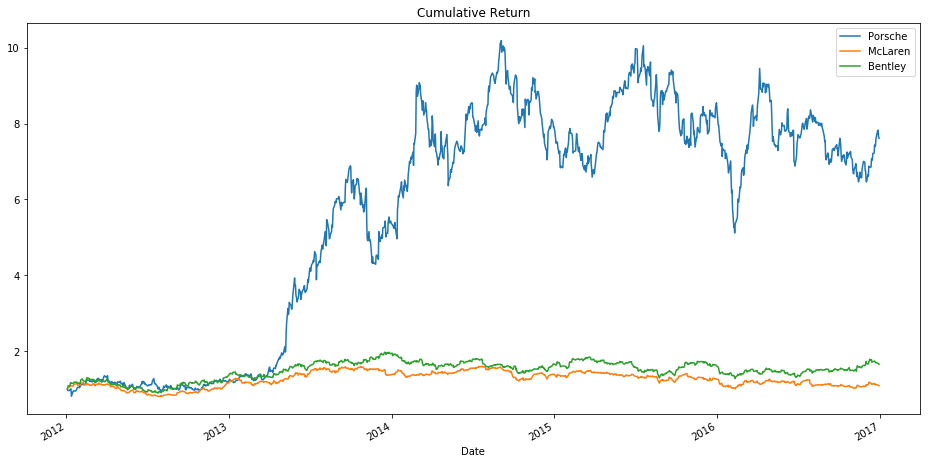

In [130]:
# this shows Porsche has got the highest cumulative return


Porsche['cumulative return'].plot(label='Porsche', figsize=(16,8), title='Cumulative Return')
McLaren['cumulative return'].plot(label='McLaren')
Bentley['cumulative return'].plot(label='Bentley')
plt.legend();

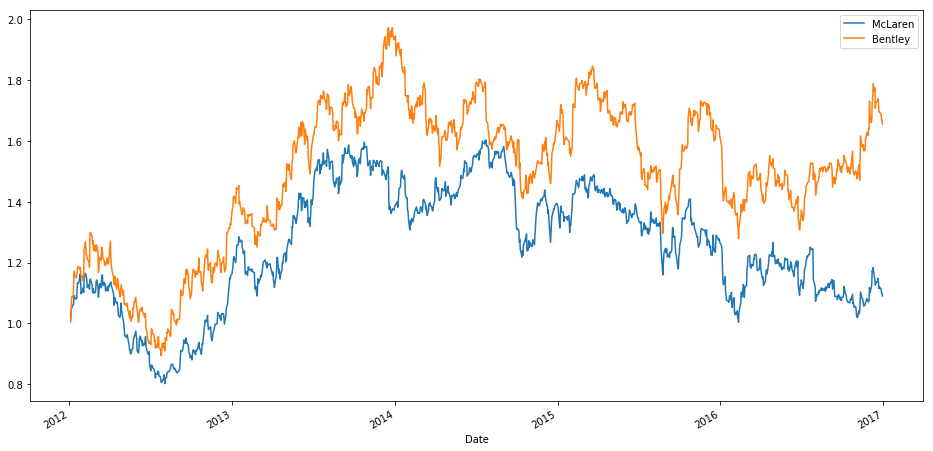

In [132]:
# this shows McLaren has got the lowest cumulative return

McLaren['cumulative return'].plot(label='McLaren',figsize=(16,8))
Bentley['cumulative return'].plot(label='Bentley')
plt.legend();